In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
s_train=pd.read_csv("SalaryData_Train(1).csv")
s_test=pd.read_csv("SalaryData_Test(1).csv")

In [3]:
s_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
s_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
s_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
s_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


<AxesSubplot:>

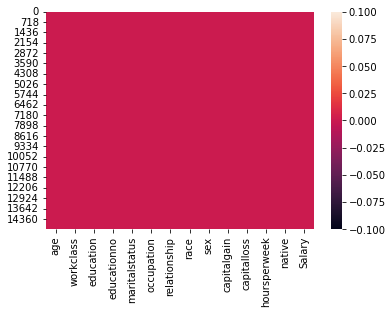

In [26]:
import seaborn as sns
sns.heatmap(s_test.isnull())

<AxesSubplot:>

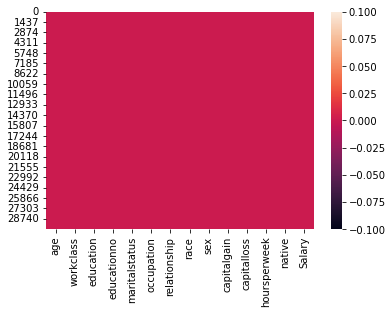

In [27]:
import seaborn as sns
sns.heatmap(s_train.isnull())

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [16]:
s_test['Salary']=lb.fit_transform(s_test['Salary'])
s_train['Salary']=lb.fit_transform(s_train['Salary'])

In [17]:
# There is huge amount of data,Hence we are considering only 400 observations of the train data and 200 observations of the test data.

In [18]:
df_test=pd.get_dummies(s_test)
df_train=pd.get_dummies(s_train)

In [19]:
x_train=df_train.drop('Salary',axis=1)
y_train=df_train['Salary']
x_test=df_test.drop('Salary',axis=1)
y_test=df_test['Salary']

In [20]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [21]:
from sklearn.svm import SVC

In [22]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [23]:
pred=model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

[[10997  2703]
 [  363   997]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     13700
           1       0.27      0.73      0.39      1360

    accuracy                           0.80     15060
   macro avg       0.62      0.77      0.64     15060
weighted avg       0.90      0.80      0.83     15060



In [25]:
np.mean(pred==y_test)*100

79.64143426294821